<a href="https://colab.research.google.com/github/RafdhiFatoni/ISE-Data-Science-Academy/blob/main/Day%204%20M3%20-%20PCA%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usecase 1: Classification

In [ ]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [ ]:
# Data Loading
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data['data'], columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## EDA

In [ ]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


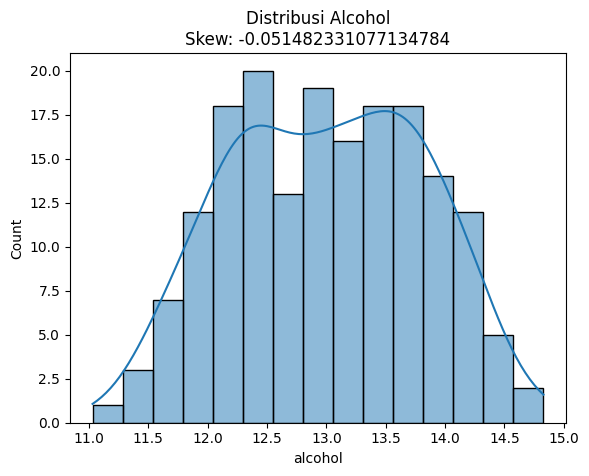

In [ ]:
sns.histplot(data=wine_df, x= 'alcohol', kde=True, bins=15)
plt.title(f'Distribusi Alcohol\nSkew: {wine_df["alcohol"].skew()}');

In [ ]:
corr_selected= wine_df.corr()
corr_selected

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


## Data Preprocessing

In [ ]:
# Split antara Fitur dan Target
X= wine_df.drop('target', axis=1) #fitur
y= wine_df['target']

In [ ]:
X.shape

(178, 13)

In [ ]:
# split data train dan test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.15, random_state=10)
print(X_train.shape)
print(X_test.shape)

(151, 13)
(27, 13)


In [ ]:
# Feature Scaling dengan StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
# Cek Variance dengan PCA
pca= PCA()
pca.fit(X_train_scaled)

PCA()

In [ ]:
# cek jumlah kompnen jika kita ingin menyimpan 80% informasi
cumsum= np.cumsum(pca.explained_variance_ratio_)
num_com= np.argmax(cumsum >=0.80) + 1

In [ ]:
num_com

5

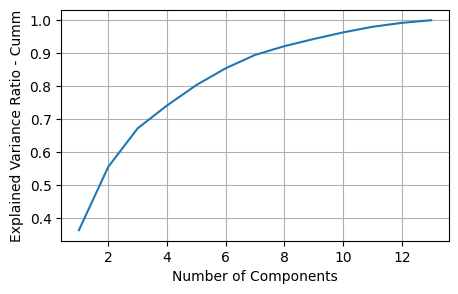

In [ ]:
# Plot Kumulatif dari Explained Variance Ratio
plt.figure(figsize=(5, 3))
plt.plot(range(1,14), cumsum)
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio - Cumm');

Berdasarkan visualisasi di atas, kita dapat melihat bahwa jika kita memilih jumlah komponen sebanyak 5, kita dapat menyimpan lebih dari 80% informasi.

In [ ]:
X_train_scaled.shape

(151, 13)

In [ ]:
X_test_scaled.shape

(27, 13)

In [ ]:
#tetapkan n_components=5 dan terapkan ke X_train_scaled
pca= PCA(n_components=5, random_state= 10)
pca.fit(X_train_scaled)

X_train_scaled_pca= scaler.transform(X_train_scaled)
X_test_scaled_pca= scaler.transform(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Melatih Model

**Model tanpa PCA**

In [ ]:
logreg_1 = LogisticRegression(random_state=10)
logreg_1.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10)

**Model dengan PCA**

In [ ]:
logreg_2 = LogisticRegression(random_state=10)
logreg_2.fit(X_train_scaled_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

## Evaluasi

In [ ]:
# cek performa model

y_pred_test = logreg_1.predict(X_test_scaled)
y_pred_test_pca = logreg_2.predict(X_test_scaled_pca)

print('Without PCA : \n', classification_report(y_test, y_pred_test))
print('With PCA : \n', classification_report(y_test, y_pred_test_pca))

Without PCA : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.67      1.00      0.80         4

    accuracy                           0.93        27
   macro avg       0.89      0.95      0.91        27
weighted avg       0.95      0.93      0.93        27

With PCA : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.67      1.00      0.80         4

    accuracy                           0.93        27
   macro avg       0.89      0.95      0.91        27
weighted avg       0.95      0.93      0.93        27



# Usecase 2: Clustering

[Kaggle Dataset: Mall Customer](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# !pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle #bikin direktori atau folder kaggle di root
!cp /content/drive/MyDrive/'DTS Resources'/kaggle/kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.54MB/s]


In [ ]:
!unzip customer-segmentation-tutorial-in-python.zip -d dataset
!ls dataset

Archive:  customer-segmentation-tutorial-in-python.zip
replace dataset/Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/Mall_Customers.csv  
Mall_Customers.csv


In [ ]:
df= pd.read_csv('/content/dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Mengganti nama kolom agar mudah digunakan
df= df.rename(columns={'Annual Income (k$)': 'annual_income',
                       'Spending Score (1-100)': 'spending_score'})

#Menggati Female:1 dan Male:0
df['Gender'].replace(['Female','Male'], [1,0], inplace=True)

# Mengganti nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

df.head()

,customerid,gender,age,annual_income,spending_score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
df.describe()

,customerid,gender,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


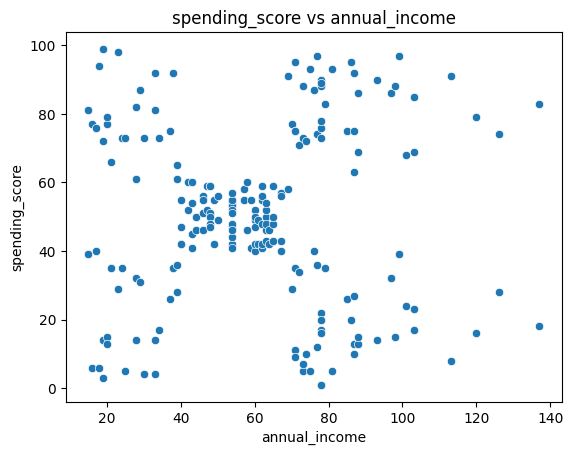

In [ ]:
sns.scatterplot(data=df,x='annual_income', y='spending_score')
plt.title('spending_score vs annual_income');

In [ ]:
num_cols= ['age', 'annual_income', 'spending_score']
cat_cols= ['gender']

In [ ]:
#pairplot


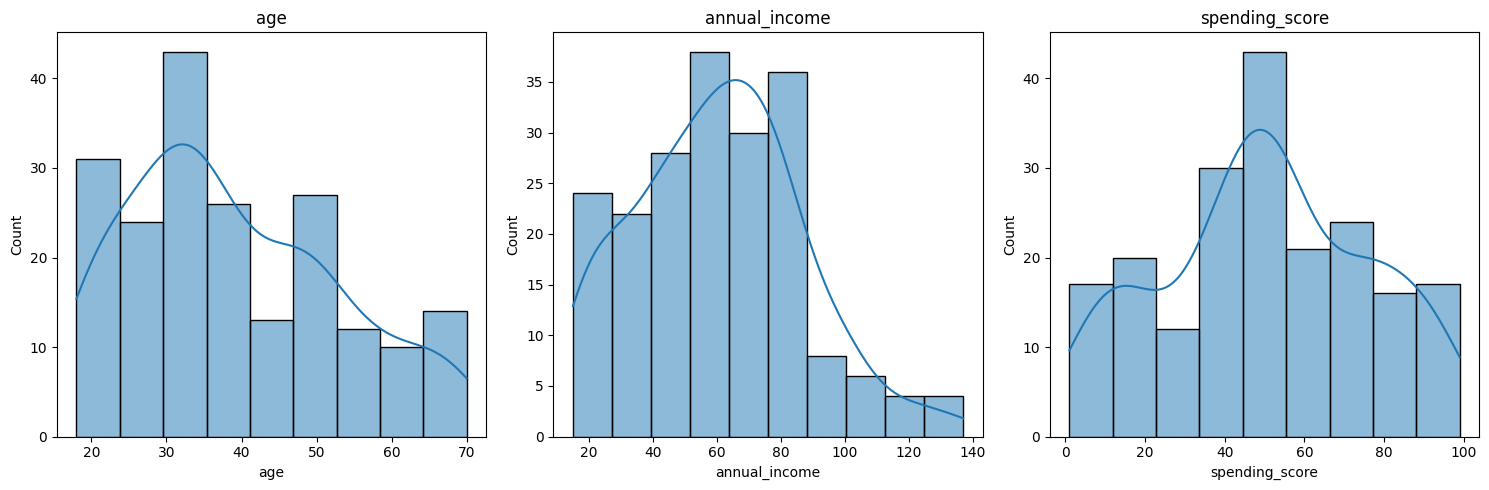

In [ ]:
# atur figure dan axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms dgn KDE
for i, column in enumerate(['age', 'annual_income', 'spending_score']):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

# Display plot
plt.tight_layout() # secara otomatis mengoptimalkan ruang di antara subplot agar tidak ada tumpang tindih
plt.show()

Hasil Pemangatan:
- rentang usia umur pelanggannya dari 20 sampai 70, terbanyak umur kisayan 30-35.
- frekuensi pelanggan yg memiliki pendapatan paling tinggi ada pada rentang?
- spending score paling tinggi ada pada rentang berapa?


In [ ]:
# Menghitung jumlah setiap kategori gender
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
gender_counts

,gender,count
0,1,112
1,0,88


In [ ]:
# Membuat pie chart dengan Plotly Express
fig = go.Figure(data=[go.Pie(labels=['Female','Male'], values=gender_counts['count'])])

# Mengatur posisi title dan legend
fig.update_layout(title_text='Persentase Gender', title_x=0.5, title_y=0.95,
                  legend=dict(x=0.75, y=0.5))

fig.show()

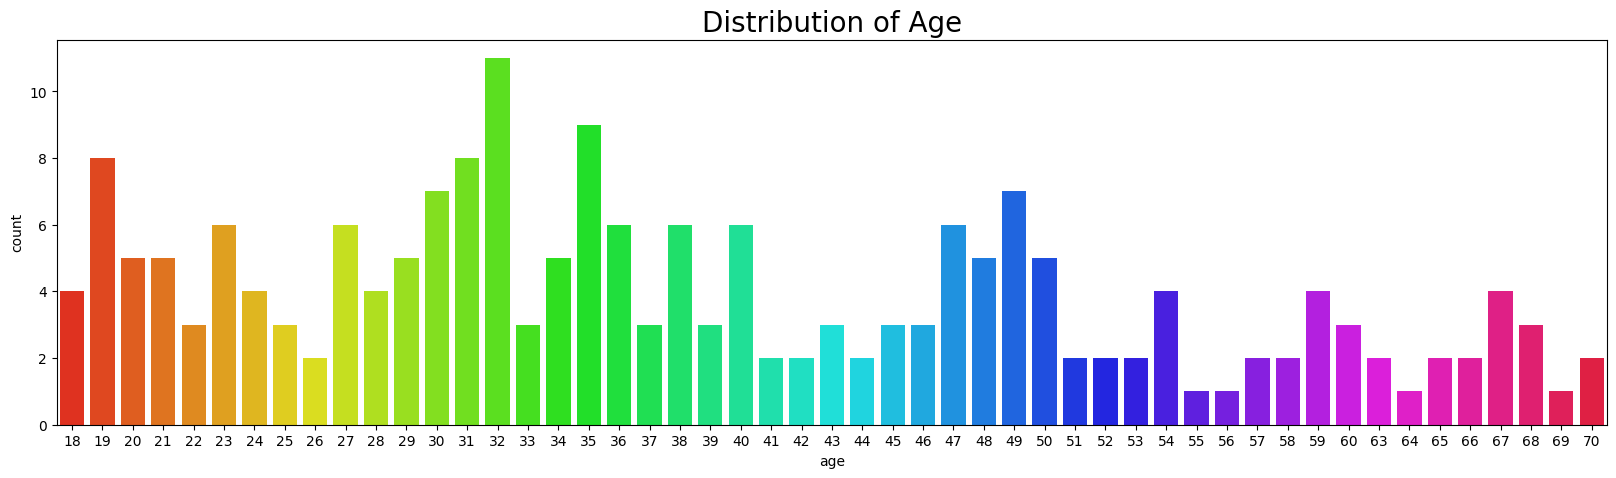

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

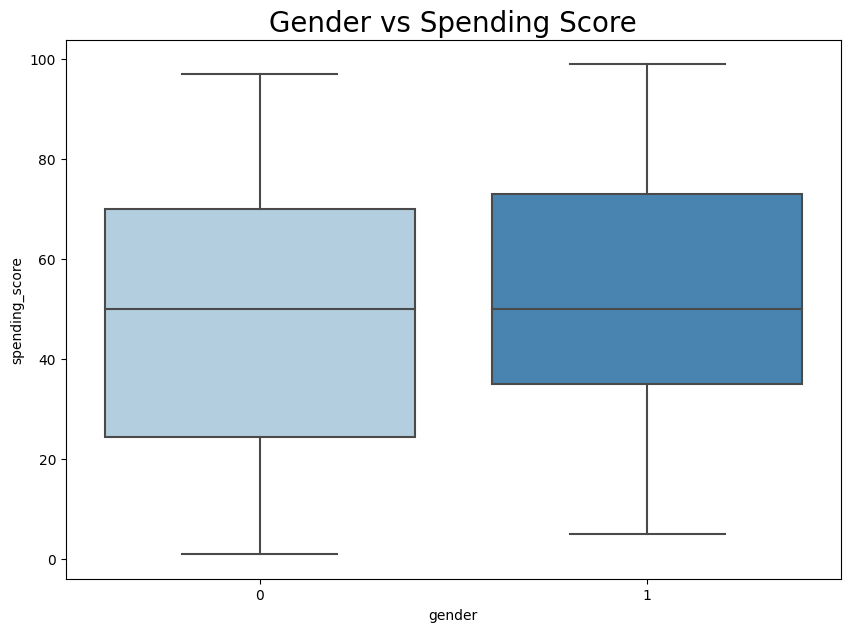

In [ ]:
#  Gender vs Spendscore
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x= 'gender', y= 'spending_score', palette='Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

## Clustering tanpa PCA

In [ ]:
x = df.loc[:, ['spending_score', 'annual_income']]

print(x.shape)

(200, 2)


In [ ]:
x

,spending_score,annual_income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


**Elbow**

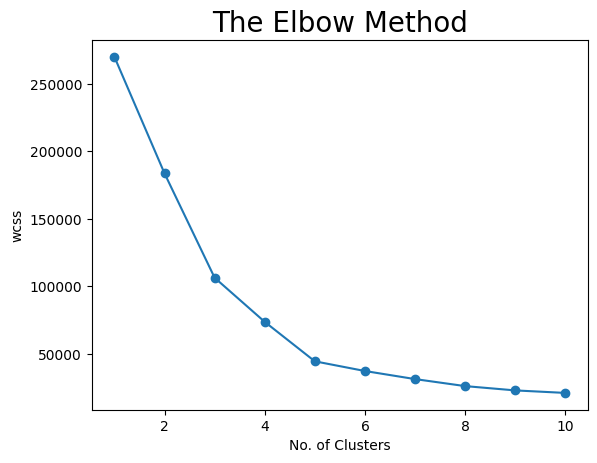

In [ ]:
wcss = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
km.fit(x)

#calculate the score
score = silhouette_score(x, km.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.554


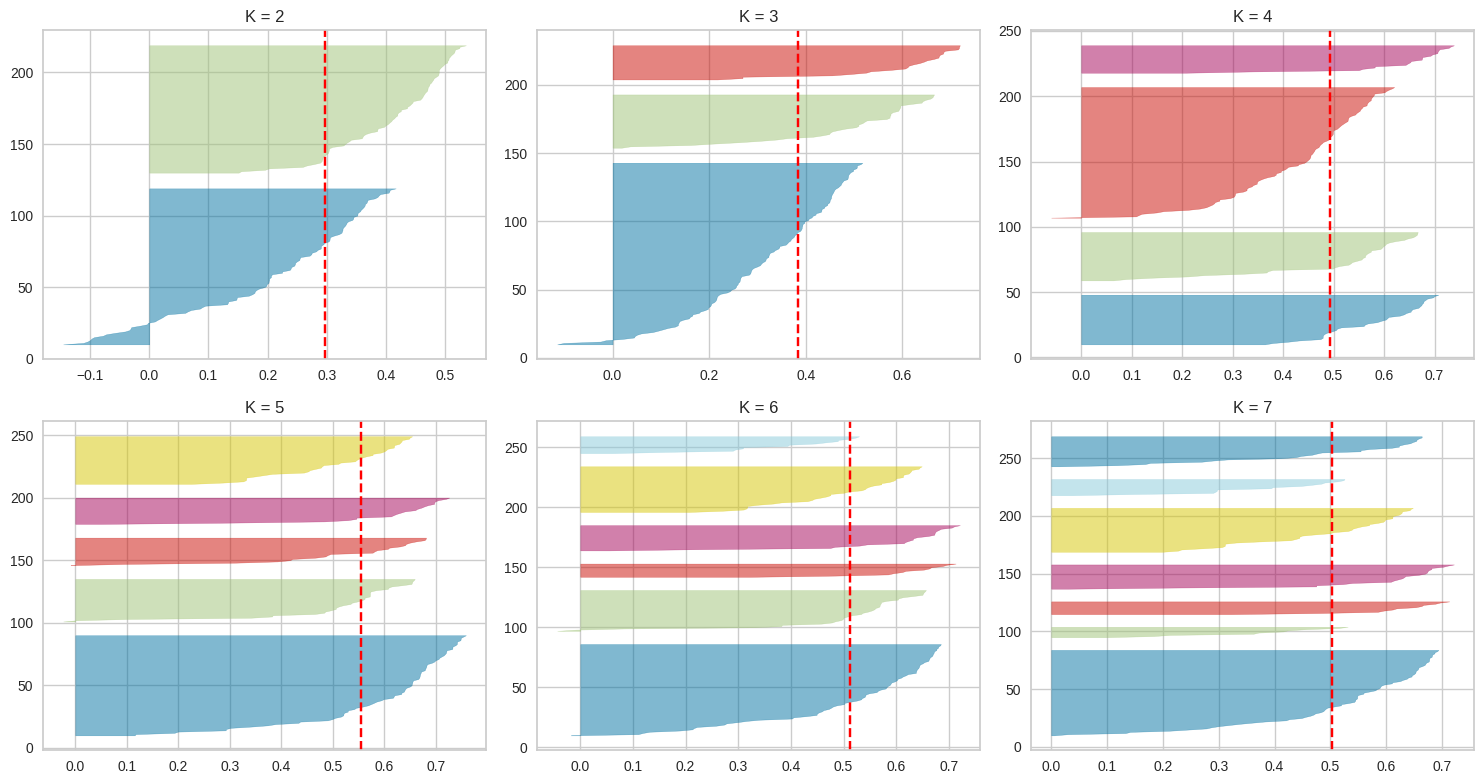

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++",
                    n_init = 'auto', max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(x)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Final K= 5

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,
            n_init = 'auto', random_state = 3)
y_pred = km.fit_predict(x)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [ ]:
#gabungkan hasil clustering dengan dafarame x
x['cluster'] = list(y_pred)
x.head()

,spending_score,annual_income,cluster
0,39,15,2
1,81,15,3
2,6,16,2
3,77,16,3
4,40,17,2


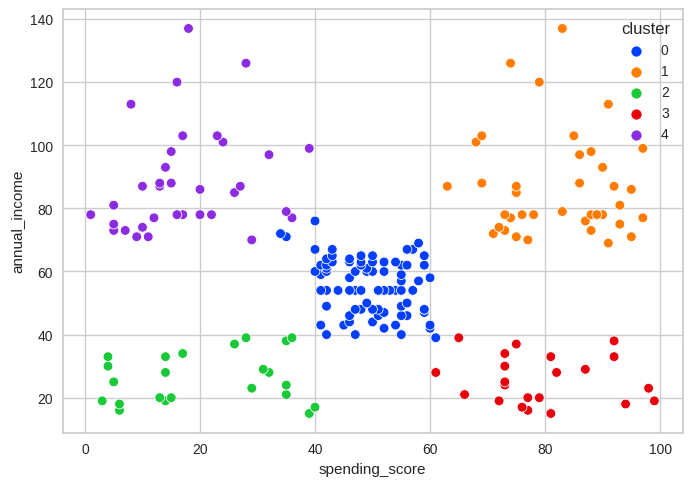

In [ ]:
sns.scatterplot(data=x, x="spending_score", y="annual_income", hue="cluster",palette="bright");

Analisis:

- Di **cluster 0** kita melihat bahwa orang-orang memiliki pendapatan rata-rata dan skor pengeluaran rata-rata, orang-orang ini lagi-lagi tidak akan menjadi target utama toko atau mal, tetapi sekali lagi mereka akan dipertimbangkan dan teknik analisis data lainnya dapat digunakan untuk meningkatkan skor pengeluaran mereka.
\

- Di **cluster 1** kami melihat bahwa orang-orang memiliki pendapatan tinggi dan nilai pengeluaran tinggi, ini adalah kasus yang ideal untuk mal atau toko karena orang-orang ini adalah sumber keuntungan utama. Orang-orang ini mungkin pelanggan tetap mal dan yakin dengan fasilitas mal.

- Di **cluster 2** kita dapat melihat orang-orang memiliki pendapatan tahunan yang rendah dan skor pengeluaran yang rendah, ini cukup masuk akal karena orang-orang yang memiliki gaji rendah lebih suka membeli lebih sedikit, sebenarnya, ini adalah orang-orang bijak yang tahu cara membelanjakan dan menghemat uang . Toko-toko/mal akan paling tidak tertarik pada orang-orang yang termasuk dalam cluster ini.

- Di **cluster 3** kita dapat melihat bahwa orang-orang berpenghasilan rendah tetapi memiliki skor pengeluaran yang lebih tinggi, mereka adalah orang-orang yang karena alasan tertentu lebih suka membeli produk meskipun berpenghasilan rendah. Mungkin karena orang-orang ini lebih dari puas dengan layanan mal. Toko/mall mungkin tidak menargetkan orang-orang ini secara efektif tetapi tetap tidak akan kehilangan mereka.


- Di **cluster 4**  kita lihat masyarakat berpenghasilan tinggi tapi pengeluarannya rendah, ini menarik. Mungkin ini orang-orang yang tidak puas atau tidak senang dengan pelayanan mall. Ini bisa menjadi target utama mal, karena berpotensi menghabiskan uang. Oleh karena itu, pihak pengelola mal akan berusaha menambah fasilitas baru agar dapat menarik minat masyarakat tersebut dan dapat memenuhi kebutuhannya.



## Clustering dengan PCA

In [ ]:
df_new = df.iloc[:,2:]
df_new

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
# scaling fiturnya
df_new_scale = StandardScaler().fit_transform(df_new)

In [ ]:
# Cek Variance dengan PCA
%%time
pca = PCA()
pca.fit(df_new_scale)

CPU times: user 2.36 ms, sys: 948 µs, total: 3.31 ms
Wall time: 9.09 ms


PCA()

In [ ]:
# cek jumlah komponen jika kita ingin menyimpan 70% informasi

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_com = np.argmax(cumsum >= 0.7) + 1
num_com

2

In [ ]:
#gunakan n_components=2
pca= PCA(n_components=2)

reduced_data= pca.fit_transform(df_new_scale)

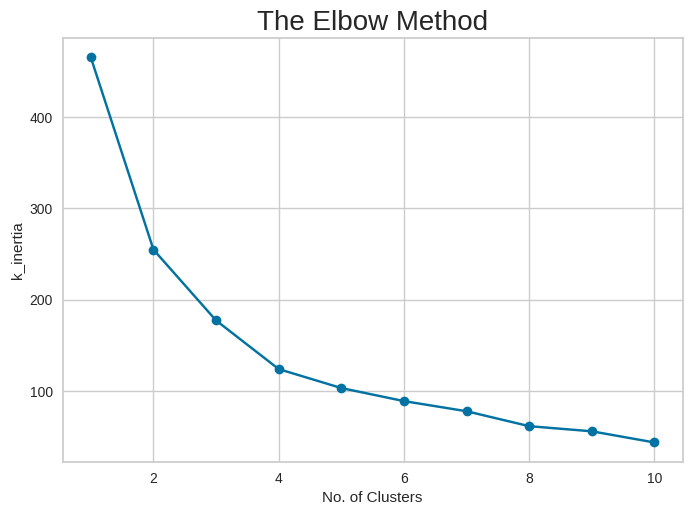

In [ ]:
k_inertia = []
#membuat iterasi dari 1-10 untuk nilai k terbaik
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
    km.fit(reduced_data)
    k_inertia.append(km.inertia_)

plt.plot(range(1, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

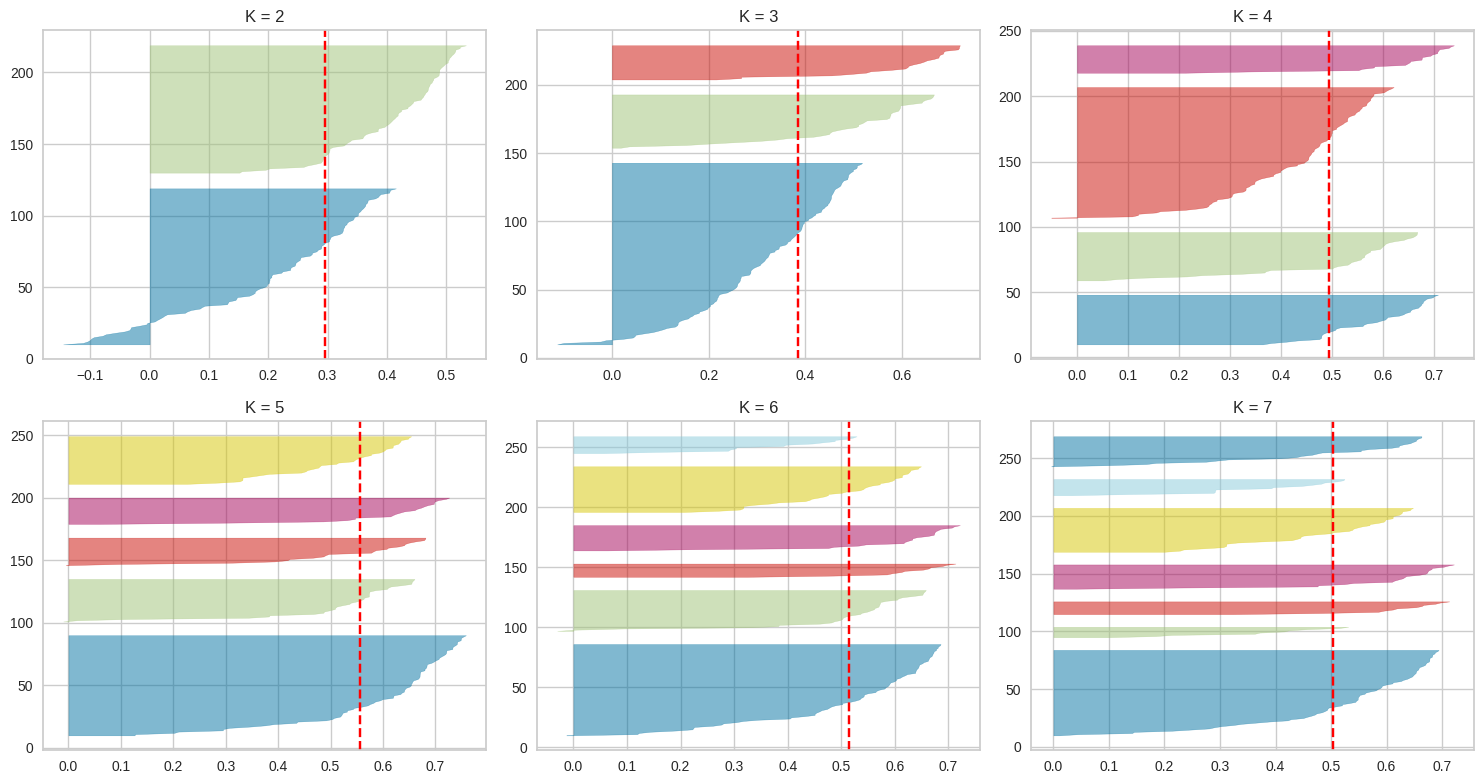

In [ ]:
# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loop melalui setiap subplot
for i, ax in enumerate(axes.flatten()):
    # Set jumlah cluster
    n_clusters = i + 2

    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++",
                    n_init = 'auto', max_iter = 100, random_state = 42)

    # Buat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer ke data x
    visualizer.fit(x)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 'auto', random_state = 3)
km.fit(reduced_data)

KMeans(n_clusters=5, n_init='auto', random_state=3)

In [ ]:
clusters= km.predict(reduced_data)
clusters

array([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 0, 3, 2,
       0, 3, 2, 2, 3, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [ ]:
reduced_data= pd.DataFrame(reduced_data, columns= ['PC1','PC2'])
reduced_data.head()

,PC1,PC2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740


In [ ]:
reduced_data['clusters']= clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.615720,-1.763481,2
1,-1.665793,-1.820747,2
2,0.337862,-1.674799,3
3,-1.456573,-1.772430,2
4,-0.038465,-1.662740,2


In [ ]:
pca_df_cluster = pd.concat([df_new, reduced_data], axis=1)
pca_df_cluster.head()

,age,annual_income,spending_score,PC1,PC2,clusters
0,19,15,39,-0.615720,-1.763481,2
1,21,15,81,-1.665793,-1.820747,2
2,20,16,6,0.337862,-1.674799,3
3,23,16,77,-1.456573,-1.772430,2
4,31,17,40,-0.038465,-1.662740,2


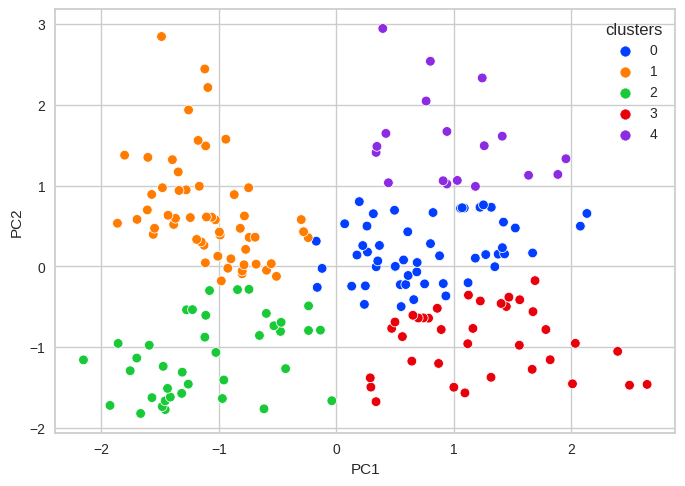

In [ ]:
sns.scatterplot(data=pca_df_cluster, x="PC1", y="PC2", hue="clusters",palette="bright");

In [ ]:
label_df= pca_df_cluster['clusters'].unique()
label_df

array([2, 3, 0, 1, 4], dtype=int32)

In [ ]:
for cluster_label in range(0, 5):
    cluster_data = pca_df_cluster.query(f'clusters == {cluster_label}')
    spending_score_mean = cluster_data['spending_score'].mean().round(2)
    print(f"Rata-rata spending score pada cluster {cluster_label}: {spending_score_mean}")


Rata-rata spending score pada cluster 0: 37.75
Rata-rata spending score pada cluster 1: 71.52
Rata-rata spending score pada cluster 2: 67.5
Rata-rata spending score pada cluster 3: 31.92
Rata-rata spending score pada cluster 4: 19.89
